In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('D:/PYTHON/ML/minute_weather.csv')

In [4]:
data.shape

(1587257, 13)

In [5]:
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [6]:
sampled_df=data[(data['rowID'] % 10) == 0]
sampled_df.shape

(158726, 13)

In [7]:
sampled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937509,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [8]:
sampled_df[sampled_df['rain_accumulation'] == 0].shape

(157812, 13)

In [9]:
sampled_df[sampled_df['rain_duration'] == 0].shape

(157237, 13)

In [10]:
del sampled_df['rain_accumulation']
del sampled_df['rain_duration']

In [11]:
row_before = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
row_after = sampled_df.shape[0]

In [12]:
row_before - row_after

46

In [13]:
sampled_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

In [14]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
          'max_wind_speed', 'relative_humidity']

In [15]:
select_df = sampled_df[features]

In [16]:
select_df.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')

In [17]:
select_df

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4
...,...,...,...,...,...,...,...
1587210,915.9,75.56,330.0,1.0,341.0,1.3,47.8
1587220,915.9,75.56,330.0,1.1,341.0,1.4,48.0
1587230,915.9,75.56,344.0,1.4,352.0,1.7,48.0
1587240,915.9,75.20,359.0,1.3,9.0,1.6,46.3


<AxesSubplot:xlabel='max_wind_speed', ylabel='max_wind_direction'>

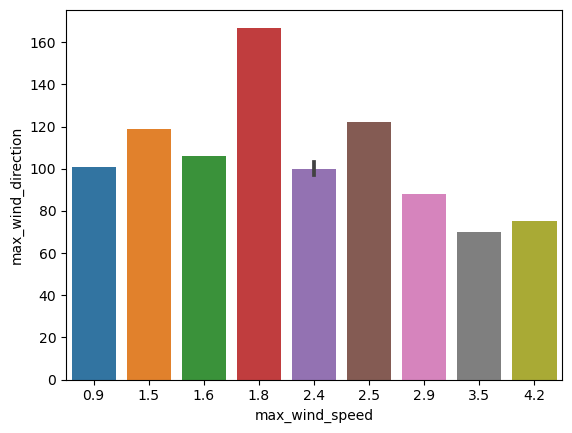

In [18]:
sns.barplot(x=sampled_df["max_wind_speed"][:10], y=sampled_df["max_wind_direction"][:10] ,data=sampled_df)

<AxesSubplot:xlabel='min_wind_direction', ylabel='min_wind_speed'>

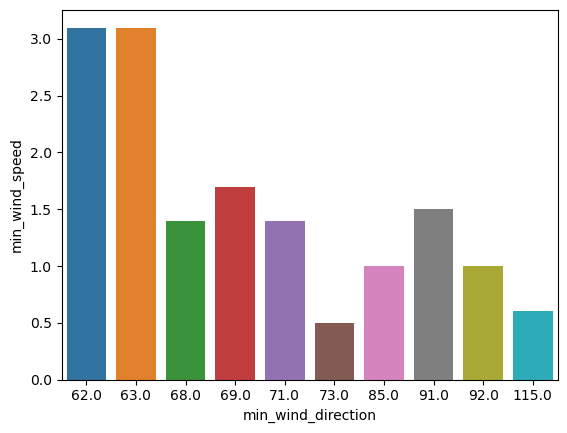

In [19]:
sns.barplot(x=sampled_df["min_wind_direction"][:10], y=sampled_df["min_wind_speed"][:10],data=sampled_df)

<AxesSubplot:xlabel='max_wind_direction', ylabel='count'>

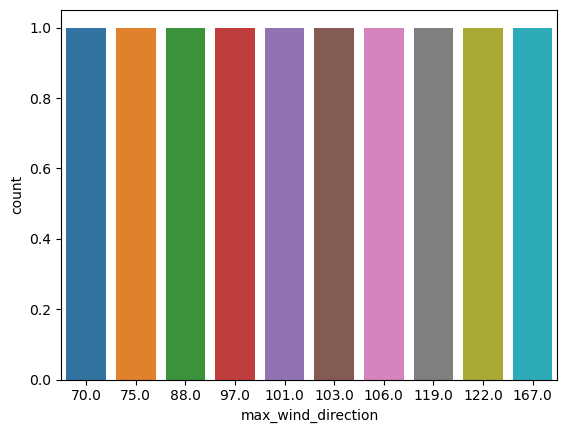

In [20]:
sns.countplot(x=sampled_df['max_wind_direction'][:10],data=sampled_df)

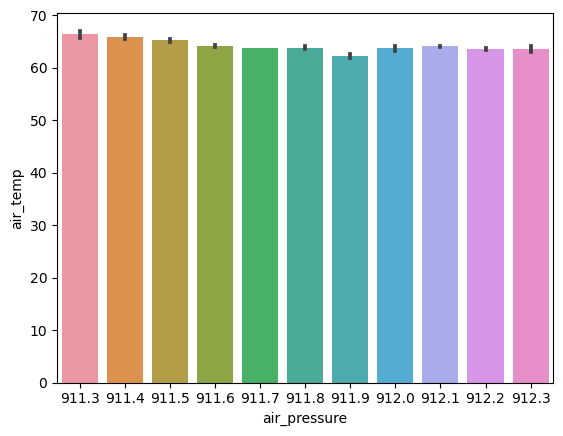

In [21]:
sns.barplot(x=data["air_pressure"][:200], y=data["air_temp"][:200], data=sampled_df)
plt.show()

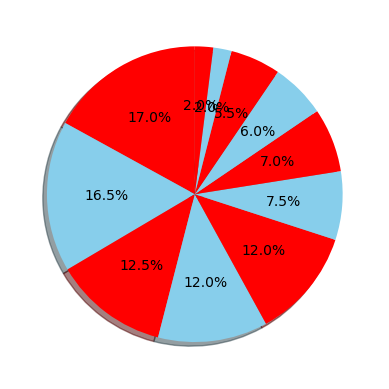

In [26]:
fig, ax1=plt.subplots()
value=data['air_pressure'][:200].value_counts().values
colors=["red","skyblue"]
ax1.pie(value,autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
plt.show()

In [30]:
X=StandardScaler().fit_transform(select_df)
X

array([[-1.48456281,  0.24544455, -0.68385323, ..., -0.62153592,
        -0.74440309,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, ...,  0.03826701,
        -0.66171726, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, ..., -0.44847286,
        -0.37231683,  0.40839371],
       ...,
       [-0.30488381,  1.15818654,  1.90856325, ...,  2.0393087 ,
        -0.70306017,  0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, ..., -1.67073075,
        -0.74440309, -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, ..., -1.55174989,
        -0.62037434, -0.05711747]])

In [31]:
kmeans = KMeans()
model = kmeans.fit(X)

In [33]:
centers = model.cluster_centers_
centers

array([[-0.27871374,  0.57787309,  0.38196055,  0.54885611,  0.49110774,
         0.495813  , -0.16244282],
       [-1.11534221, -0.96672849,  0.42342087,  1.68036335,  0.51893791,
         1.64725246,  1.0275012 ],
       [ 1.29925218, -0.24201252, -1.150702  ,  1.72883363, -1.04358895,
         1.83363555, -1.11607348],
       [-0.22222274, -1.02276005,  0.51875349, -0.28920201,  0.67504411,
        -0.28479138,  1.21589966],
       [ 0.05055598, -0.66545862, -1.16236578, -0.57461621, -1.00621646,
        -0.58910163,  0.74333263],
       [ 0.32875829,  0.60724448, -1.2517595 , -0.50012584, -1.10327887,
        -0.50674133, -0.80852882],
       [ 0.11895063,  0.67897858,  0.68152789, -0.66365708,  0.8964325 ,
        -0.6512475 , -0.59688949],
       [ 0.23772997,  0.30735094,  1.8872838 , -0.65076256, -1.55001965,
        -0.57514156, -0.27502838]])